<a href="https://colab.research.google.com/github/Hilminabil154/2206010_PrakAI_Tugas1/blob/main/2206010_Praktikum_AI_Tugas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Membuat Dataset Penjualan (Digitalise & Collect)**

In [27]:
import pandas as pd

# Buat data
data = {
    "Tanggal": ["2025-03-01", "2025-03-01", "2025-03-02", "2025-03-02", "2025-03-03", "2025-03-03", "2025-03-04", "2025-03-04", "2025-03-05", "2025-03-05"],
    "Produk": ["Laptop Asus", "HP Samsung", "Printer Canon", "Mouse Logitech", "Keyboard Razer", "Monitor LG", "Flashdisk 32GB", "Harddisk 1TB", "SSD 512GB", "Powerbank 20.000mAh"],
    "Jumlah Terjual": [2, 5, 3, 10, 4, 2, 15, 3, 5, 7],
    "Stok": [10, 20, 15, 50, 30, 12, 100, 25, 18, 40],
    "Harga Satuan": [8500000, 3200000, 1500000, 250000, 1200000, 2750000, 150000, 900000, 1750000, 400000],
}

# Simpan dalam DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file csv
df.to_csv("data_penjualan_latihan.csv", index=False)

print("File data_penjualan_latihan.csv berhasil dibuat dan bisa dibaca di Google Collab")

File data_penjualan_latihan.csv berhasil dibuat dan bisa dibaca di Google Collab


**2. Membersihkan dan Mengolah Data (Transform)**

In [28]:
# Membaca File CSV
df = pd.read_csv("data_penjualan_latihan.csv")

# Cek apakah ada data yang kosong
print("Jumlah data kosong per kolom:")
print(df.isnull().sum())

# Mengisi Data yang Kosong tanpa inplace=True
df = df.assign(
    Tanggal=df["Tanggal"].fillna("2025-03-04"),
    Jumlah_Terjual=df["Jumlah Terjual"].fillna(df["Jumlah Terjual"].mean()),
    Stok=df["Stok"].fillna(df["Stok"].mean()),
    Harga_Satuan=df["Harga Satuan"].fillna(df["Harga Satuan"].median())
)

# Konversi kolom Tanggal ke format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

# Tambahkan Kolom "Total Penjualan"
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

# Tambahkan Kolom "Keuntungan" (Asumsi modal Rp 10.000 per unit terjual)
df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)

# Menampilkan 5 data teratas untuk verifikasi
print(df.head())

Jumlah data kosong per kolom:
Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     Tanggal          Produk  Jumlah Terjual  Stok  Harga Satuan  \
0 2025-03-01     Laptop Asus               2    10       8500000   
1 2025-03-01      HP Samsung               5    20       3200000   
2 2025-03-02   Printer Canon               3    15       1500000   
3 2025-03-02  Mouse Logitech              10    50        250000   
4 2025-03-03  Keyboard Razer               4    30       1200000   

   Jumlah_Terjual  Harga_Satuan  Total Penjualan  Keuntungan  
0               2       8500000         17000000    16980000  
1               5       3200000         16000000    15950000  
2               3       1500000          4500000     4470000  
3              10        250000          2500000     2400000  
4               4       1200000          4800000     4760000  


**3. Melatih Model AI (Train & Execute)**

In [29]:
!pip install scikit-learn

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih Fitur (x) dan target (y)
X = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int) # 1 Jika stok kurang dari 5, 0 jika cukup

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print("Akurasi Model: ", accuracy_score(y_test, y_pred))

Akurasi Model:  1.0


**4. Prediksi Restock Produk (Execute & Insights)**

In [31]:
# Contoh produk baru (jumlah terjual 8, stok tersisa 3)
produk_baru = [[8, 3]]
prediksi = model.predict(produk_baru)

if prediksi[0] == 1:
  print ("Produk perlu di-restock!")
else:
  print("Produk tidak perlu di-restock.")

Produk tidak perlu di-restock.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


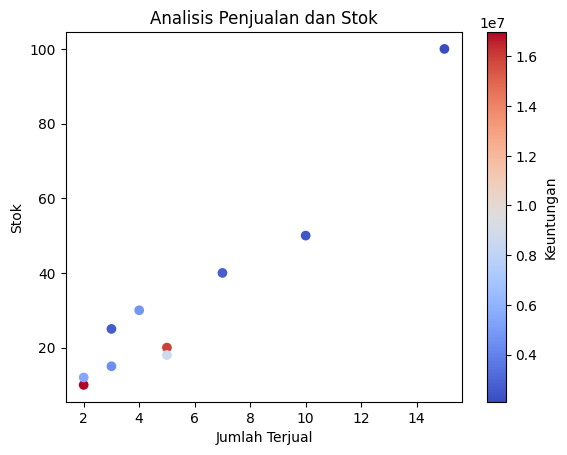

In [32]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="Keuntungan")
plt.show()